In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, mean_squared_error, r2_score
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv(r"C:\Users\kavir\OneDrive\Documents\GitHub\Enhancing-Public-Health-by-Identifying-Unhealthy-Foods-Promoting-Healthier-Alternatives\datasets\cleaned_final_dataset.csv")

df['healthy'] = (df['calories'] < 120).astype(int)

features = ['protein', 'fat']
X = df[features]
y_class = df['healthy']     
y_reg = df['calories']        

LR

Linear Regression R²: 0.16
MSE: 30983.91


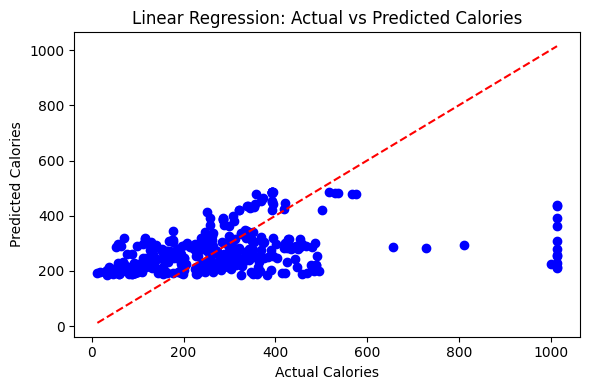

In [3]:
X_train_lr, X_test_lr, y_train_lr, y_test_lr = train_test_split(X, y_reg, test_size=0.3, random_state=42)

lr_model = LinearRegression()
lr_model.fit(X_train_lr, y_train_lr)
y_pred_lr = lr_model.predict(X_test_lr)

mse = mean_squared_error(y_test_lr, y_pred_lr)
r2 = r2_score(y_test_lr, y_pred_lr)
print("Linear Regression R²:", round(r2, 2))
print("MSE:", round(mse, 2))

plt.figure(figsize=(6, 4))
plt.scatter(y_test_lr, y_pred_lr, color='blue')
plt.plot([y_test_lr.min(), y_test_lr.max()], [y_test_lr.min(), y_test_lr.max()], 'r--')
plt.xlabel("Actual Calories")
plt.ylabel("Predicted Calories")
plt.title("Linear Regression: Actual vs Predicted Calories")
plt.tight_layout()
plt.show()


Logistic Regression Accuracy: 0.82


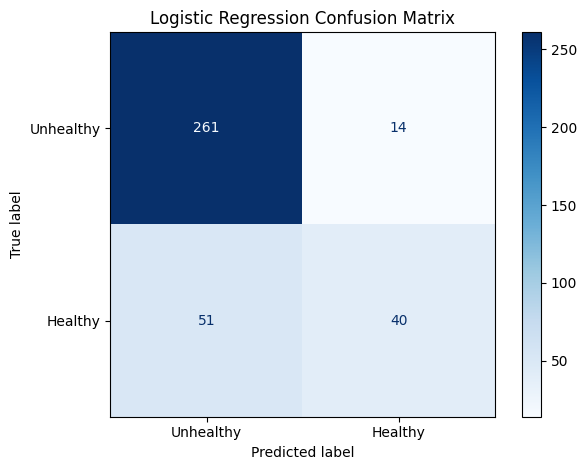

In [4]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X_scaled, y_class, test_size=0.3, random_state=42)

log_model = LogisticRegression()
log_model.fit(X_train_log, y_train_log)
y_pred_log = log_model.predict(X_test_log)

log_acc = accuracy_score(y_test_log, y_pred_log)
log_cm = confusion_matrix(y_test_log, y_pred_log)

print("Logistic Regression Accuracy:", round(log_acc, 2))

disp = ConfusionMatrixDisplay(confusion_matrix=log_cm, display_labels=['Unhealthy', 'Healthy'])
disp.plot(cmap="Blues")
plt.title("Logistic Regression Confusion Matrix")
plt.tight_layout()
plt.show()